#  Binary Class Logistic Regression

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold
from pylab import scatter, show, legend, xlabel, ylabel
%matplotlib inline

### Logistic Sigmoid Function
$$ \sigma(z) = \frac{1}{1+\text{exp}(-z)}$$


In [0]:
## The sigmoid function adjusts the cost function hypotheses 
## to adjust the algorithm proportionally for worse estimations
def Sigmoid(z):
    Gz = 1.0 / (1.0 + np.exp(-z))
    return Gz

In [0]:
## make the simulated data per class (Here, 2 class)
## draw random samples from a multivariate normal distribution

def simulateData(numData1=100, numData2=100):
    mu1 = [-1, -1]
    mu2 = [1, 1]

    cov1 = [[1, 0], [0, 1]]
    cov2 = [[2, 0.5], [0.5, 1]]
    
    data1 = np.random.multivariate_normal(mu1, cov1, numData1)
    data2 = np.random.multivariate_normal(mu2, cov2, numData2)
    
    return data1, data2

# Logistic regression

### Error function
$$E(w)=-\sum_{n=1}^{N}\{t_n\text{ln}y_n+(1-t_n)\text{ln}(1-y_n)\}$$
### Taking the gradient of the error funciton w.r.t $w$
$$\nabla E(w)=\sum_{n=1}^{N}(y_{n}-t_{n})\phi_{n} $$   $$(\phi_{n}=x_n)$$
### Iterative approach
$$w^{(\text{new})}=w^{(\text{old})}-\eta\nabla E(w)$$


In [0]:
class myLogisticRegressor(object):
  
    """Implementation of a Binary Class Logistic Regression"""
    
    
    def __init__(self, eta, epochs, numDim):
      self.eta = eta  # learning rate
      self.epochs = epochs  # the number of epochs
      self.theta = []
      self.initTheta(numDim)
      
      
    def initTheta(self, numDim):
      ## make the theta be random values from a uniform distribution over [0, 1)
      self.theta = np.random.rand(numDim).reshape([-1,numDim]) 
        
        
    def fit(self, X, y, init=True, verbose=True):
      if init==True:
        self.initTheta(len(X[0]))  #  (1  X  # of the features)
        
      costSet = []
      for i in range(self.epochs):
          self.gradientDescent(X, y) 
          cost = self.Cost_Function(X, y)
          costSet.append(cost)  # store the cost values for each epoch
      
      ## plot a epoch vs. cost graph
      if verbose==True:
        plt.plot(range(1,len(costSet)+1), np.array(costSet), marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.show()
     
    
    def gradientDescent(self, X, y):
      CFDerivative = self.Cost_Function_Derivative(X, y)
      self.theta = self.theta - float(self.eta)*CFDerivative
    
   
    ## calculate a gradient value by taking the gradient of the cost function
    def Cost_Function_Derivative(self, X, y):
      h = self.hypothesis(X)

      error = (h-y) * X
      gradient = np.sum(error)

      J = (1/float(len(y))) * gradient
      return J
      
      
    def Cost_Function(self, X, y):
      h = self.hypothesis(X)

      error = y*np.log(h) + (1-y)*np.log(1-h)  # cross-entropy error function
      sumOfErrors = np.sum(error)

      J = (-1/float(len(y))) * sumOfErrors
      return J   
      
      
    def hypothesis(self, X):
      z = np.dot(X, self.theta.T)
      h = Sigmoid(z.reshape(len(z),1))  # logistic sigmoid function 
      return h
    
    
    def predict(self, X):
      ## predict 1 if the predicted probability is >=0.5
      ## predict 0 if the predicted probability is <0.5
      return np.round(self.hypothesis(X))
    
       
    def plot_decision_regions(self, X, y, numDim, resolution=0.02):
      ## setup marker generator and color map
      markers = ('s', 'x', 'o', '^', 'v')
      colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
      cmap = ListedColormap(colors[:len(np.unique(y))])

      ## plot the decision surface
      x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
      x2_min, x2_max = X[:,1].min() - 1, X[:,1].max()+1
      xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
      
      data = np.array([xx1.ravel(), xx2.ravel()]).T
      if numDim>2:
        data = np.hstack((data, np.ones((len(data[:,1]), 1))))
        
      Z = self.predict(data)
      Z = Z.reshape(xx1.shape)
      
      plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)  # draw filled contours
      plt.xlim(xx1.min(), xx1.max())
      plt.ylim(xx2.min(), xx2.max())

      # plot class samples
      labelSet = ['class 1', 'class 2']
      for idx, c1 in enumerate(np.unique(y)):
          classidx = np.where(y==c1)
          plt.scatter(x=X[classidx,0], y=X[classidx,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=labelSet[idx])
          
      plt.show()



---



---



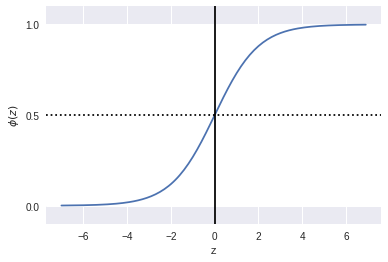

In [5]:
## simply plot the sigmoid function for some values in the range -7 to 7 to see what it look like

z = np.arange(-7,7,0.1)
phi_z = Sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

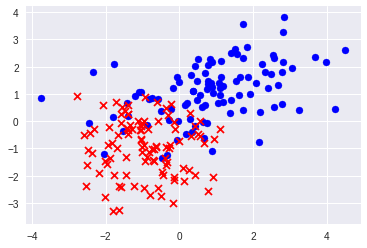

In [8]:
clsData1, clsData2 = simulateData(100, 100)

X = np.vstack((clsData1, clsData2))  #  (# of the samples  X  # of the features)
y = np.vstack((np.zeros((len(clsData1),1)), np.ones((len(clsData2),1))))  #  (# of the samples  X  1)

numSample, numFeature = X.shape

X_with_bias = np.hstack((X, np.ones((numSample,1))))

numSample, numFeature = X.shape

pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

scatter(X[pos,0],X[pos,1],marker='o', c='b')
scatter(X[neg,0],X[neg,1],marker='x', c='r')
show()

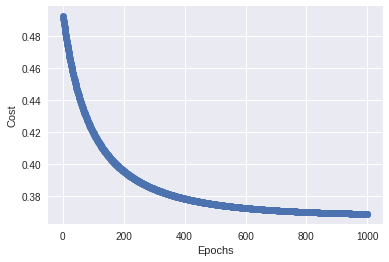

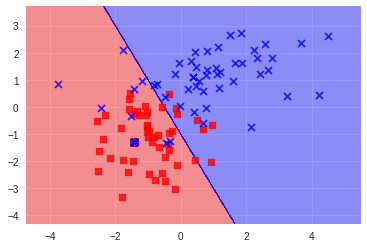

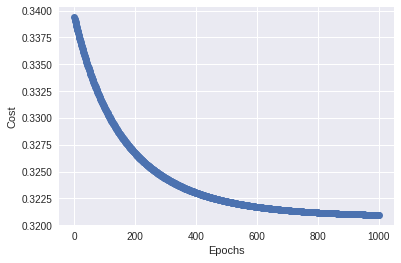

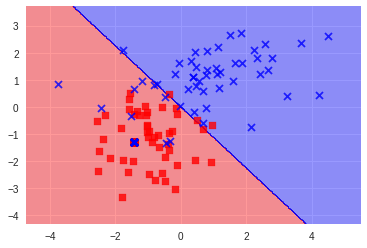

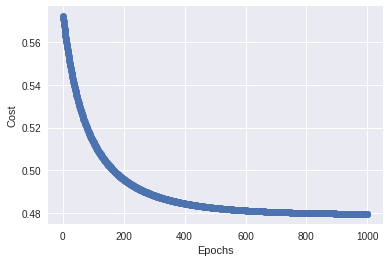

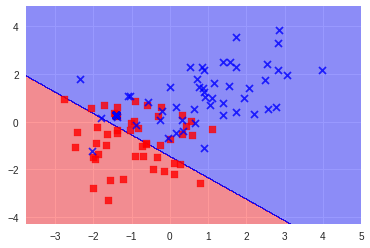

In [0]:
## make cross validation splits, taking care to choose the same
## amount of classes in each split!
CV = StratifiedKFold(n_splits=2)

## make a list of accuracy values to be populated 
acc_bias = list()
acc = list()

## this loops across all splits for the data
for train, test in CV.split(X, y):
  
    answer =  y[test]  # ground truth label for test dataset
    
    # when the bias exists...
    mylogit_bias = myLogisticRegressor(eta=0.01, epochs=1000, numDim=len(X_with_bias[0]))
    mylogit_bias.fit(X_with_bias[train], y[train])
    mylogit_bias.plot_decision_regions(X_with_bias[train], y[train], numDim=len(X_with_bias[0]))
    prediction_bias = mylogit_bias.predict(X_with_bias[test])
    
    score_bias = np.sum(prediction_bias.T == answer.T)
    total_score_bias = float(score_bias) / float(len(X_with_bias[test]))
    acc_bias.append(total_score_bias)
    
        
    
    # when the bias does not exist...
    mylogit = myLogisticRegressor(eta=0.01, epochs=1000, numDim=len(X[0]))
    mylogit.fit(X[train], y[train])
    mylogit.plot_decision_regions(X[train], y[train], numDim=len(X[0]))
    prediction = mylogit.predict(X[test])
       
    score = np.sum(prediction.T == answer.T)
    total_score = float(score) / float(len(X[test]))   
    acc.append(total_score)
    
print('With the bias, found mean accuracy of {:.3f}'.format(np.mean(acc_bias)))
print(acc_bias)    
print('Without the bias, found mean accuracy of {:.3f}'.format(np.mean(acc)))
print(acc)

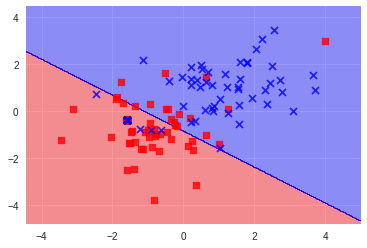

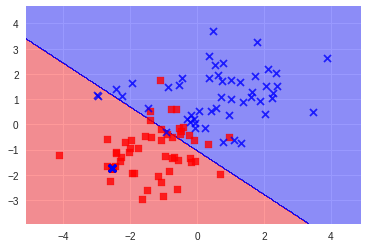

With the bias, found mean accuracy of 0.756
[0.7623762376237624, 0.75]


In [0]:
## If one outlier data is added,...

acc_outlier = list()

X_with_outlier = np.vstack((X, np.array([4,3])))
X_with_outlier = np.hstack((X_with_outlier, np.ones((numSample+1,1))))
y_with_outlier = np.vstack((y, np.array([0.])))

for train, test in CV.split(X_with_outlier, y_with_outlier):
  
    answer =  y_with_outlier[test]
    
    mylogit_outlier = myLogisticRegressor(eta=0.01, epochs=1000, numDim=len(X_with_outlier[0]))
    mylogit_bias.fit(X_with_outlier[train], y_with_outlier[train], verbose=False)
    mylogit_bias.plot_decision_regions(X_with_outlier[train], y_with_outlier[train], numDim=len(X_with_outlier[0]))
    prediction_outlier = mylogit_outlier.predict(X_with_outlier[test])
    
    score_outlier = np.sum(prediction_outlier.T == answer.T)
    total_score_outlier = float(score_outlier) / float(len(X_with_outlier[test]))
    acc_outlier.append(total_score_outlier)
   
    
print('With the bias, found mean accuracy of {:.3f}'.format(np.mean(acc_outlier)))
print(acc_outlier)

# Supplementary

In [0]:
from sklearn.linear_model import LinearRegression, RidgeClassifier, LogisticRegression, Lasso

In [0]:
## Logistic Regression with scikit-learn

acc_logistic = list()

# init logistic regression - note that the default logistic
# regression in sklearn has a regularizer built in on the weights
# if we specify a very large "C" value, we switch this OFF and
# obtain the "standard" logistic regression model!
logit = LogisticRegression(C=100000000)

# # this loops across all splits for the data
for train, test in CV.split(X, y): 
    # fit the classifier
    logit.fit(X_with_bias[train],y[train])    
    acc_logistic.append(logit.score(X_with_bias[test],y[test]))

print('found mean accuracy of {:.3f}'.format(np.mean(acc_logistic)))
print(*acc_logistic)

found mean accuracy of 0.850
0.87 0.83


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
## Linear Regression with scikit-learn

acc_linear = list()

## init two classifiers
lr1 = LinearRegression()
lr2 = LinearRegression()

## this loops across all splits for the data
for train, test in CV.split(X_with_bias, y):
    
    # fit the two classifiers
    lr1.fit(X[train],y[train])
    lr2.fit(X[train],1-y[train])
    
    # check the accuracy on the test data
    acc_linear.append(np.size(np.where(((lr1.predict(X[test])>lr2.predict(X[test]))-y[test])==0))/2/len(test))

print('found mean accuracy of {:.3f}'.format(np.mean(acc_linear)))
print(*acc_linear)

found mean accuracy of 0.845
0.83 0.86
